<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>


## <o>Day 03</o>: <m>(__Num 4 ML__)</m>

> <c>Linear Algebra tools</c>




In [1]:
import numpy as np
import time 
import matplotlib.pyplot as plt
import scipy.linalg as LinAlg
import timeit

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

>> <c> **Gaussian Elimination** </c>

Suppose we want to solve the linear equation as below
$$ \boldsymbol{A} x = \boldsymbol{b} $$

![](./Images/Screenshot_2023-10-21-13-07-25_1920x1080.png)
![](./Images/Screenshot_2023-10-21-13-07-41_1920x1080.png)

In [2]:
def Forward(A,b,size):
    for i in range(size):
        A[i,:] = A[i,:] / A[i,:]*A[i,i]
        b[i] = b[i] / A[i,i]

        for j in range(i+1,size):
            A[j,:] = A[j,:] - A[i,:]*A[j,i]
            b[j] = b[j] - b[i]*A[j,i]
            A[j,i] = 0
    return A,b


def Backward(A,b,size):

    res = np.zeros((size,1))
    for i in range(size-1,-1,-1):
        res[i] = b[i]
        for j in range(i+1,size):
            res[i] = res[i] - A[i,j] * res[j]
    return res

def GaussElimination(A,b,size):
    A,b = Forward(A,b,size)
    res = Backward(A,b,size)
    return res

def DataGenerator(size):
    A = np.random.randn(size,size)
    A = A + np.diag(np.diag(A)**2)
    b = np.random.rand(size)
    return A,b

def Comparison(size):
    TimeScratch = 0.0
    TimeLinAlg = 0.0
    iterations = 0
    ScratchTime = []
    LinAlgTime = []
    np.random.seed(100)

    while size <= 100:
        A,b = DataGenerator(size=size)
        st = time.time()
        res = GaussElimination(A,b,size)
        TimeScratch = time.time() - st
        st = time.time()
        resLinAlg = np.linalg.solve(A,b)
        TimeLinAlg = time.time() - st
        ScratchTime.append(round(TimeScratch,10))
        LinAlgTime.append(round(TimeLinAlg,10))
        size +=3
        iterations += 1
    
    return ScratchTime,LinAlgTime



/tmp/ipykernel_18186/3138638604.py:3: RuntimeWarning: invalid value encountered in divide
  A[i,:] = A[i,:] / A[i,:]*A[i,i]
/tmp/ipykernel_18186/3138638604.py:7: RuntimeWarning: overflow encountered in multiply
  A[j,:] = A[j,:] - A[i,:]*A[j,i]


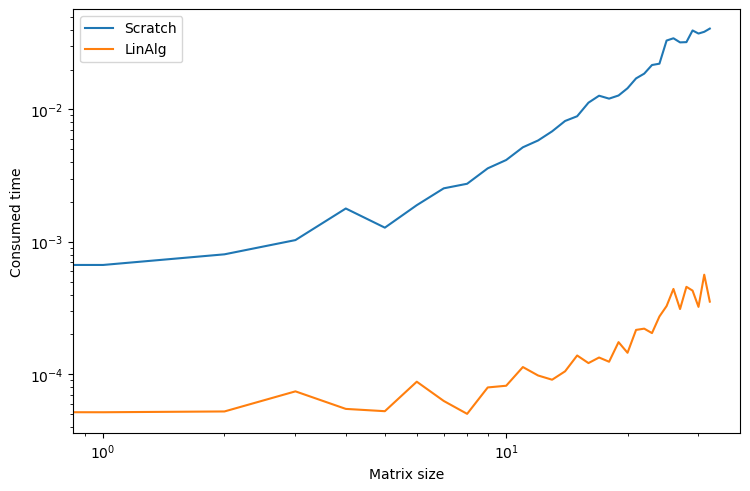

In [3]:
ScratchTime,LinAlgTime = Comparison(3)
fig = plt.figure(figsize=plt.figaspect(0.65),layout='constrained')
ax = fig.add_subplot(1,1,1)

ax.loglog(ScratchTime,label="Scratch")
ax.loglog(LinAlgTime,label="LinAlg")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Consumed time")
ax.legend()

<style>
o { color: Orange }
c { color: Cyan }
m { color: Magenta }
</style>

>> <c>Lu Compact Decomposition</c>

![](./Images/Screenshot_2023-10-21-13-07-59_1920x1080.png)

>> <c>Lu Partial Decomposition</c>


![](./Images/Screenshot_2023-10-21-13-10-47_1920x1080.png)

![](./Images/Screenshot_2023-10-21-13-11-04_1920x1080.png)

In [4]:
def LU_partial_decomposition(matrix):
    n, m = matrix.shape
    P    = np.identity(n)
    L    = np.identity(n)
    U    = matrix.copy()
    PF   = np.identity(n)
    LF   = np.zeros((n,n))
    for k in range(0, n - 1):
        index = np.argmax(abs(U[k:, k]))
        index = index + k 
        if index != k:
            P = np.identity(n)
            P[[index, k], k:n] = P[[k, index], k:n]
            U[[index, k], k:n] = U[[k, index], k:n] 
            PF = np.dot(P, PF)
            LF = np.dot(P, LF)
        L = np.identity(n)
        for j in range(k+1,n):
            L[j, k]  = -(U[j, k] / U[k, k])
            LF[j, k] =  (U[j, k] / U[k, k])
        U = np.dot(L,U)
    np.fill_diagonal(LF, 1)
    return PF, LF, U



In [12]:
B = np.arange(1,17).reshape(4,4)
P,L,U = LU_partial_decomposition(B)
P

PP,LL,UU = LinAlg.lu(B)


array([[ 1.        ,  0.        ,  0.        ,  0.        ],
       [ 0.07692308,  1.        ,  0.        ,  0.        ],
       [ 0.69230769,  0.33333333,  1.        ,  0.        ],
       [ 0.38461538,  0.66666667, -0.47058824,  1.        ]])

In [6]:
def ComparisonLU(size):
    TimeScratch = 0.0
    TimeLinAlg = 0.0
    iterations = 0
    ScratchTime = []
    LinAlgTime = []

    while size <= 100:
        A,_ = DataGenerator(size=size)
        st = time.time()
        res,_,_ = LU_partial_decomposition(A)
        TimeScratch = time.time() - st
        st = time.time()
        resLinAlg,_,_ = LinAlg.lu(A)
        TimeLinAlg = time.time() - st
        ScratchTime.append(round(TimeScratch,10))
        LinAlgTime.append(round(TimeLinAlg,10))
        size +=5
        iterations += 1
    
    return ScratchTime,LinAlgTime

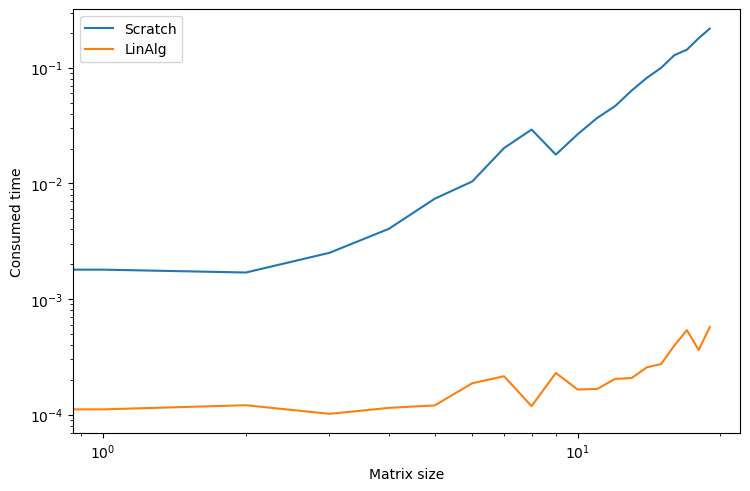

In [7]:
ScratchTime,LinAlgTime = ComparisonLU(3)
fig = plt.figure(figsize=plt.figaspect(0.65),layout='constrained')
ax = fig.add_subplot(1,1,1)

ax.loglog(ScratchTime,label="Scratch")
ax.loglog(LinAlgTime,label="LinAlg")
ax.set_xlabel("Matrix size")
ax.set_ylabel("Consumed time")
ax.legend()